In [55]:
import mediapipe as mp  # Import mediapipe
import  cv2 as cv  # Import opencv
import csv
import os
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
import sklearn

In [56]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [57]:
def draw_mark(image, results):
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

def cap_imag():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    k =cv2.waitKey(1500)
    cap.release()
    cv2.destroyAllWindows()
    return ret ,image

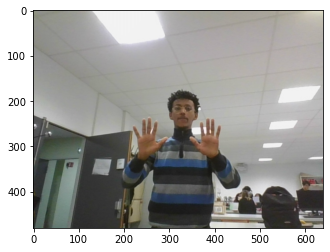

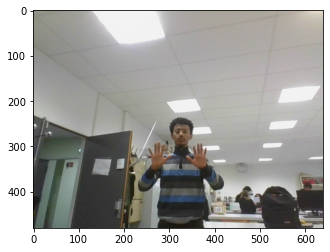

In [60]:
with mp_holistic.Holistic(static_image_mode=True) as holistic :
    
    ret,image=cap_imag()
    ret2,image2=cap_imag()

    #results = holistic.process(image)
    #results2 = holistic.process(image2)

    #draw_mark(image2, results2)
   # draw_mark(image, results)

plt.imshow(image)
plt.show()

plt.imshow(image2)
plt.show()

In [99]:
def Image_normaliser(img):
    mp_holistic = mp.solutions.holistic
    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        results = holistic.process(img)
        Right_hand_mark = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark])
        Left_hand_mark = np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark])
        pose = np.array([[res.x,res.y,res.z]for res in results.pose_landmarks.landmark])
    
        #on fait les calcule pour avoir les valeur des distance dans le monde pixel
    
        depx =  abs(pose[11][0] - pose[12][0]) #distance epaule 
        epaule1 = np.array(pose[12][0:3])
        epaule2 = np.array(pose[11][0:3])
        origine=(epaule1+epaule2)/2
        dornose=abs(pose[0][1]-origine[1])
        dz=depx  #comme on sait pas encore comment est estimé la valeur z on prend meme valeur que x
        dnormaliser=np.array([depx,dornose,dz])
        normaliser=np.array([40,20,40])
    
        shifted_hand_marks_coordr=Right_hand_mark-origine #right
        shifted_hand_marks_coordl=Left_hand_mark-origine  #left
        shifted_pose_marks_coord=pose-origine             #pose 
    
        hand_marks_coord_normalizedr = shifted_hand_marks_coordr*normaliser/dnormaliser  #right hand
        hand_marks_coord_normalizedl = shifted_hand_marks_coordl*normaliser/dnormaliser  #left hand
        pose_marks_coord_normalized = shifted_pose_marks_coord*normaliser/dnormaliser    #pose
   #     print(hand_marks_coord_normalizedr)
        #les valeurs retournées ne sont pas sous forme de vecteur utilise methode .flatten() pour vecteur.
        return hand_marks_coord_normalizedr/np.linalg.norm(hand_marks_coord_normalizedr[...,:-1],axis=1).reshape(21,1),hand_marks_coord_normalizedl/np.linalg.norm(hand_marks_coord_normalizedl[...,:-1],axis=1).reshape(21,1),pose_marks_coord_normalized/np.linalg.norm(pose_marks_coord_normalized[...,:-1],axis=1).reshape(33,1)

In [98]:
r,l,p=Image_normaliser(image)
print(p)

AttributeError: 'numpy.ndarray' object has no attribute 'length'

In [87]:
r,l,p=Image_normaliser(image)
r2,l2,p2=Image_normaliser(image2)


vecr = np.linalg.norm(r[...,:-1],axis=1)
vecr= vecr.reshape(21,1)
print(r/vecr)


[[-8.99406201e-01  4.37113814e-01  1.82455108e+00]
 [-8.89520509e-01  4.56895243e-01  2.15346355e+00]
 [-9.15785291e-01  4.01668147e-01  2.73886694e+00]
 [-9.55953505e-01  2.93518135e-01  3.42273385e+00]
 [-9.84466486e-01  1.75572600e-01  4.30275897e+00]
 [-9.99219005e-01  3.95143143e-02  2.49875018e+00]
 [-9.80367301e-01 -1.97180009e-01  2.55837929e+00]
 [-9.38909522e-01 -3.44164074e-01  2.47885721e+00]
 [-8.84667696e-01 -4.66222123e-01  2.35591897e+00]
 [-9.99990972e-01  4.24929315e-03  2.17086334e+00]
 [-9.73609075e-01 -2.28222191e-01  2.12151638e+00]
 [-9.31363003e-01 -3.64091963e-01  2.00158558e+00]
 [-8.85212990e-01 -4.65185943e-01  1.86454523e+00]
 [-9.99686887e-01  2.50225555e-02  1.90905262e+00]
 [-9.84798978e-01 -1.73697935e-01  1.83021461e+00]
 [-9.56840809e-01 -2.90612570e-01  1.73276014e+00]
 [-9.23036402e-01 -3.84712620e-01  1.63981030e+00]
 [-9.97058820e-01  7.66401285e-02  1.69097943e+00]
 [-9.98888164e-01 -4.71427085e-02  1.54085146e+00]
 [-9.92694415e-01 -1.20655701e-

[[-33.19463487  16.13268114  67.33921429]
 [-26.76301986  13.74661555  64.79129713]
 [-21.25021251   9.3204527   63.55365726]
 [-17.4279203    5.35110823  62.39961711]
 [-13.99418183   2.49576286  61.16367828]
 [-25.97494214   1.02718426  64.9556215 ]
 [-24.17891003  -4.86307294  63.09759895]
 [-23.29247152  -8.53802386  61.4955004 ]
 [-22.62765038 -11.92482924  60.2586835 ]
 [-29.76233538   0.12647003  64.61054618]
 [-28.93094147  -6.78165706  63.04118113]
 [-28.61411977 -11.1859404   61.49440038]
 [-28.60104523 -15.03005983  60.24306367]
 [-33.47898683   0.83799219  63.93316569]
 [-33.42066973  -5.89470687  62.11115082]
 [-33.4563965  -10.16140751  60.58678682]
 [-33.46483693 -13.94781944  59.45159257]
 [-37.15940092   2.85630216  63.02113898]
 [-39.5615193   -1.86711309  61.02627616]
 [-41.18612791  -5.00591225  60.00172861]]
